# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [5]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [8]:
# Your code here
def alpha_func(D, idx):
    sample = D.iloc[idx]
    sepal_length = sample['Sepal.Length']
    sepal_width = sample['Sepal.Width']
    alpha = (sepal_width / sepal_length).mean()
    return alpha



Test the code below

In [7]:
alpha_func(df, range(100))

0.5759643359353188

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [ ]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Calculating the mean of Sepal.Length provides a single point estimate, but it does not give any information about the variability or uncertainty of this estimate. Bootstrapping provides a way to estimate the standard error, construct confidence intervals, and understand the distribution of the estimate, giving a more comprehensive understanding of the data.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [9]:
# Add your code here to set the seed
def boot_SE(data, num_bootstrap=1000, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_means = []
    
    for _ in range(num_bootstrap):
        bootstrap_indices = rng.choice(data.index, size=len(data), replace=True)
        bootstrap_sample = data.iloc[bootstrap_indices]
        bootstrap_means.append(bootstrap_sample['Sepal.Length'].mean())
    
    bootstrap_means = np.array(bootstrap_means)
    se_bootstrap = np.std(bootstrap_means)
    
    return se_bootstrap

# Calculate the bootstrap standard error for Sepal.Length
sepal_length_bootstrap_se = boot_SE(df, num_bootstrap=1000, seed=0)
print(f"Bootstrap Standard Error of Sepal.Length: {sepal_length_bootstrap_se}")

Bootstrap Standard Error of Sepal.Length: 0.06649295592099295


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [10]:
# Your code here
def boot_alpha(data, num_bootstrap=1000, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_alphas = []
    
    for _ in range(num_bootstrap):
        bootstrap_indices = rng.choice(data.index, size=len(data), replace=True)
        bootstrap_sample = data.iloc[bootstrap_indices]
        alpha = alpha_func(bootstrap_sample, bootstrap_sample.index)
        bootstrap_alphas.append(alpha)
    
    bootstrap_alphas = np.array(bootstrap_alphas)
    se_bootstrap = np.std(bootstrap_alphas)
    alpha_mean = np.mean(bootstrap_alphas)
    
    # Compute confidence interval (e.g., 95% CI)
    alpha_ci = np.percentile(bootstrap_alphas, [2.5, 97.5])
    
    return se_bootstrap, alpha_mean, alpha_ci

# Evaluate the accuracy of alpha estimate with B = 1000
se_alpha, alpha_mean, alpha_ci = boot_alpha(df, num_bootstrap=1000, seed=0)

print(f"Bootstrap Standard Error of Alpha: {se_alpha}")
print(f"Bootstrap Mean of Alpha: {alpha_mean}")
print(f"Bootstrap 95% Confidence Interval of Alpha: {alpha_ci}")

Bootstrap Standard Error of Alpha: 0.012929157502206474
Bootstrap Mean of Alpha: 0.5347112753480328
Bootstrap 95% Confidence Interval of Alpha: [0.51002569 0.55954667]


_(vi)_ What is the original mean value of `Sepal.Length`?

In [11]:
# Your code here
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f"Original Mean of Sepal.Length: {original_mean_sepal_length}")

Original Mean of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [12]:
# Add your code here
def boot_SE_samples(data, num_bootstrap=1000, seed=0):
    rng = np.random.default_rng(seed)
    bootstrap_means = []
    
    for _ in range(num_bootstrap):
        bootstrap_indices = rng.choice(data.index, size=len(data), replace=True)
        bootstrap_sample = data.iloc[bootstrap_indices]
        bootstrap_means.append(bootstrap_sample['Sepal.Length'].mean())
    
    bootstrap_means = np.array(bootstrap_means)
    return bootstrap_means

# Get the bootstrap samples
bootstrap_samples = boot_SE_samples(df, num_bootstrap=1000, seed=0)

# Calculate the mean and standard deviation of the bootstrapped samples
boot_mean = np.mean(bootstrap_samples)
boot_std = np.std(bootstrap_samples)
print(f"Bootstrapped Mean: {boot_mean}")
print(f"Bootstrapped Standard Deviation: {boot_std}")

Bootstrapped Mean: 5.842284666666666
Bootstrapped Standard Deviation: 0.06649295592099295


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [13]:
# Add your code here
ci_lower, ci_upper = np.percentile(bootstrap_samples, [2.5, 97.5])
print(f"95% Confidence Interval for Sepal.Length: [{ci_lower}, {ci_upper}]")

95% Confidence Interval for Sepal.Length: [5.718616666666667, 5.974716666666667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

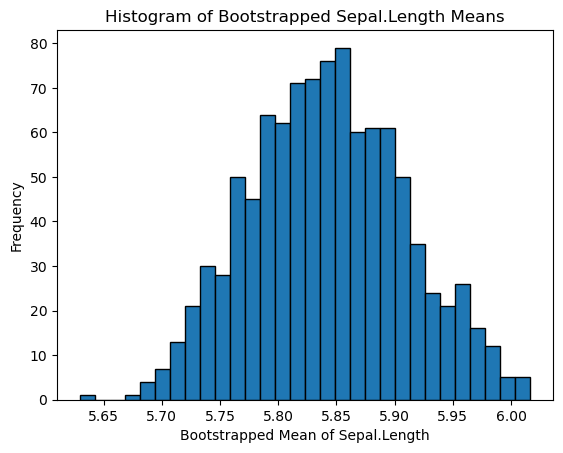

In [14]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_samples, bins=30, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Sepal.Length Means')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

The histogram helps us understand the distribution of the bootstrapped sample means and provides a visual way to see the variability and uncertainty of the mean Sepal.Length estimate. The histogram indicates that the mean Sepal.Length is around 5.85 cm, with most bootstrapped means falling within a narrow range around this value.

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here
Based on the bootstrapped analysis, we can provide the shipping company with the average length of iris' petals along with a measure of uncertainty. This includes the original mean, the bootstrap mean, the standard error, and the 95% confidence interval. These metrics give a comprehensive view of the expected petal length and its variability, helping in more accurate space allotment for the shipment.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
